## Lectura 10-2: Modelos regularizados

### Descomposición de la varianza del error

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/03_bias_variance.png" alt="ml" style="width: 40%"/>

A menudo se utilizan los términos "sesgo" y "varianza" o "compensación entre sesgo y varianza" para describir el rendimiento de un modelo; por ejemplo, es posible que encuentre charlas, libros o artículos en los que se diga que un modelo tiene una varianza o un sesgo elevados. ¿Qué significa eso? En general, podríamos decir que una "alta varianza" es proporcional a un ajuste excesivo **(overfitting)**, y un "alto sesgo" es proporcional a un ajuste insuficiente **(underfitting)**.

En cualquier caso, ¿por qué intentamos hacer esta descomposición sesgo-varianza? La descomposición de la pérdida en sesgo y varianza nos ayuda a entender los algoritmos de aprendizaje, ya que estos conceptos están correlacionados con la inadaptación y la sobreadaptación.


Para utilizar los términos más formales de sesgo y varianza, supongamos que tenemos un estimador puntual $\hat{\theta}$ de algún parámetro o función $\theta$. Entonces, el sesgo se define comúnmente como la diferencia entre el valor esperado del estimador y el parámetro que queremos estimar:


$$
\text{Bias} = E[\hat{\theta}] - \theta.
$$

Si el sesgo es mayor que cero, también decimos que el estimador está sesgado positivamente, si el sesgo es menor que cero, el estimador está sesgado negativamente, y si el sesgo es exactamente cero, el estimador es insesgado. Del mismo modo, definimos la varianza como la diferencia entre el valor esperado del estimador al cuadrado menos la expectativa al cuadrado del estimador:


$$
\text{Var}(\hat{\theta}) = E\big[\hat{\theta}^2\big] - \bigg(E\big[\hat{\theta}\big]\bigg)^2.
$$

Nótese que en el contexto de esta lrctura, será  más conveniente escribir la varianza en su forma alternativa:

$$
\text{Var}(\hat{\theta}) = E[(E[{\hat{\theta}}] - \hat{\theta})^2].
$$

Para ilustrar el concepto más en el contexto observemos las siguiente figuras: 




![](..\Images\high-bias-plot.png)

![](..\Images\varianceplot.png)


Podemos descomponer una función de pérdida como la pérdida al cuadrado en tres términos, una varianza, un sesgo y un término de ruido. Sin embargo, para simplificar, ignoraremos el término de ruido.

$$
\text{Bias}(\hat{\theta}) = E[\hat{\theta}] - \theta, \quad \text{Var}(\hat{\theta}) = E[(E[{\hat{\theta}}] - \hat{\theta})^2].
$$

Recordemos que en el contexto de estas clases (notas) de aprendizaje automático, definimos 

- la función verdadera o de destino como $ y = f(x)$,
- el valor objetivo predicho como $\hat{y} = \hat{f}(x) = h(x)$,
- y la pérdida al cuadrado como $S = (y - \hat{y})^2$. (Utilizo $S$ aquí porque será más fácil distinguirlo de $E$, que utilizamos para la *expectativa* en esta lectura).

Para empezar con la descomposición de la pérdida de error cuadrático en sesgo y varianza, vamos a hacer un poco de manipulación algebraica, es decir, sumar y restar el valor esperado de $\hat{y}$ y luego ampliar la expresión utilizando la fórmula cuadrática $(a+b)^2 = a^2 + b^2 + 2ab)$:

$$
\begin{equation}
\begin{split}
S = (y - \hat{y})^2 \\
(y - \hat{y})^2 &= (y - E[{\hat{y}}] + E[{\hat{y}}] - \hat{y})^2 \\
&= (y-E[{\hat{y}}])^2 + (E[{\hat{y}}] - y)^2 + 2(y - E[\hat{y}])(E[\hat{y}] - \hat{y}). 
\end{split}
\end{equation}
$$



A continuación, sólo tenemos que utilizar la expectativa en ambos lados, y ya hemos terminado:

$$
\begin{align}
E[S] &= E[(y - \hat{y})^2] \\
E[(y - \hat{y})^2]
&= (y-E[{\hat{y}}])^2 + E[(E[{\hat{y}}] - \hat{y})^2]\\
&= \text{[Bias]}^2 + \text{Variance}.
\end{align}
$$

Usted puede preguntarse qué pasó con el término "$2ab$" ($2(y - E[\hat{y}])(E[\hat{y}] - \hat{y})$) cuando utilizamos la expectativa. Resulta que se evalúa a cero y por lo tanto desaparece de la ecuación, que se puede demostrar de la siguiente manera:

$$
\begin{align}
E[2(y - E[{\hat{y}}])(E[{\hat{y}}] - \hat{y})]  &= 2 E[(y - E[{\hat{y}}])(E[{\hat{y}}] - \hat{y})] \\
&=  2(y - E[{\hat{y}}])E[(E[{\hat{y}}] - \hat{y})] \\
&= 2(y - E[{\hat{y}}])(E[E[{\hat{y}}]] - E[\hat{y}])\\
&= 2(y - E[{\hat{y}}])(E[{\hat{y}}] - E[{\hat{y}}]) \\
&= 0.
\end{align}
$$

Así, esta es la descomposición canónica de la pérdida de error al cuadrado en sesgo y varianza. Al desarrollar modelos de regresión, es esencial comprender cómo los diferentes errores contribuyen a la imprecisión de las predicciones. La descomposición entre sesgo y varianza nos proporciona un marco para analizar estos errores y entender cómo afectan al rendimiento del modelo.

- **Causas del Sesgo:** El sesgo puede ser causado por un modelo demasiado simple, la falta de variables relevantes en el modelo, o la elección de un tipo incorrecto de modelo para los datos.
- **Consecuencias del Sesgo Alto:** Un modelo con un sesgo alto no será capaz de capturar las complejidades de los datos, resultando en predicciones imprecisas.

- **Causas de la Varianza Alta:** La varianza alta puede ser causada por un modelo demasiado complejo, tener demasiadas variables en el modelo, o entrenar el modelo con datos insuficientes.
- **Consecuencias de la Varianza Alta:** Un modelo con alta varianza puede tener un rendimiento excelente en los datos de entrenamiento, pero fallar al generalizar a nuevos datos.


En la práctica, es imposible reducir simultáneamente el sesgo y la varianza. A medida que se reduce el sesgo, la varianza aumenta y viceversa. El objetivo es encontrar el punto óptimo de equilibrio que minimice el error total.

Para diagnosticar problemas de sesgo y varianza y entender cómo mejorar nuestro modelo, podemos utilizar:

* Curvas de Aprendizaje: Gráficos que muestran cómo cambia el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento.
* Curvas de Validación: Gráficos que muestran cómo cambia el rendimiento del modelo a medida que ajustamos la complejidad del modelo.

### División de Datos: Entrenamiento y Prueba

Cuando desarrollamos modelos de regresión lineal, o cualquier otro tipo de modelo predictivo, es crucial evaluar de manera precisa y justa su rendimiento. Una de las prácticas más esenciales para lograr esto es dividir nuestro conjunto de datos en dos partes distintas: entrenamiento y prueba.

#### ¿Por Qué Dividir los Datos?
La división de datos tiene un propósito esencial: proporcionar una evaluación honesta del rendimiento del modelo en datos no vistos previamente. El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, mientras que el conjunto de prueba se utiliza para evaluar qué tan bien el modelo generaliza a datos nuevos.

- **Prevención del Sobreajuste:** Sin una división de entrenamiento-prueba, podríamos terminar con un modelo que se ajusta perfectamente a los datos con los que fue entrenado, pero que falla estrepitosamente al enfrentarse a nuevos datos. Este fenómeno se conoce como sobreajuste.
- **Evaluación Realista del Rendimiento:** Al tener un conjunto de prueba separado, obtenemos una medida más realista del rendimiento del modelo, ya que este conjunto de datos no influyó de ninguna manera en la construcción del modelo.

#### ¿Cómo Dividir los Datos?
La manera en que dividimos los datos puede tener un impacto significativo en la evaluación del rendimiento del modelo. Algunos puntos a considerar incluyen:

- **Tamaño de la División:** Una división común podría ser 80% para entrenamiento y 20% para prueba, aunque esto puede variar dependiendo del tamaño del conjunto de datos.
- **Aleatoriedad:** La división debe ser aleatoria para asegurar que no haya sesgos en cómo se seleccionan los datos para cada conjunto.
- **Estratificación:** En clasificación, y a veces en regresión, es útil asegurarse de que la proporción de clases o de ciertos valores clave sea similar en ambos conjuntos. Esto se conoce como estratificación.

#### Validación Cruzada: Una Alternativa y Complemento
Aunque la división de entrenamiento-prueba es crucial, en algunos casos, podría no ser suficiente para obtener una evaluación completa del rendimiento del modelo. Aquí es donde entra en juego la validación cruzada.

- **Validación Cruzada:** Esta técnica implica dividir el conjunto de datos en k subconjuntos, entrenando el modelo k veces, cada vez utilizando un subconjunto diferente como conjunto de prueba y el resto como conjunto de entrenamiento. Esto proporciona una evaluación más robusta del rendimiento del modelo.



## Repaso Regresión lineal

* Fórmula de predicción para características de entrada x:
    * $\beta_1$ ... $\beta_p$ usualmente llamados _ponderadores_ o _coeficientes_ , $\beta_0$ el _bias_ o _intercepto_
    * Supone que los errores son $N(0,\sigma)$

$$\hat{y} = \mathbf{w}\mathbf{x} + \beta_0 = \sum_{i=1}^{p} \beta_i \cdot x_i + w_0 = w_1 \cdot x_1 + \beta_2 \cdot x_2 + ... + \beta_p \cdot x_p + \beta_0 $$

Bien, ése es el modelo de regresión lineal, pero ¿cómo lo entrenamos? Recordemos que entrenar un modelo significa ajustar sus parámetros para que se ajuste lo mejor posible al conjunto de datos de entrenamiento. Para ello, primero necesitamos una medida de lo bien (o mal) que el modelo se ajusta a los datos de entrenamiento. En nuestras lecturas pasadas hemos insistido que la medida de rendimiento más común de un modelo de regresión es el error cuadrático medio. 

- Por lo tanto, para entrenar un modelo de regresión lineal, necesitamos encontrar el valor de $\beta$ que minimice el RMSE. En la práctica, es más sencillo minimizar el error cuadrático medio (MSE) que el RMSE, y conduce al mismo resultado (porque el valor que minimiza una función positiva también minimiza su raíz cuadrada).


* La función de pérdida es la _suma de errores al cuadrado_ (SSE) (o residuos) entre las predicciones $\hat{y}_i$ (rojo) y los verdaderos objetivos de regresión $y_i$ (azul) en el conjunto de entrenamiento.

$$\mathcal{L}_{SSE} = \sum_{n=1}^{N} (y_n-\hat{y}_n)^2 = \sum_{n=1}^{N} (y_n-(\mathbf{\beta}\mathbf{x_n} + \beta_0))^2$$ 

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/02_least_squares.png" alt="ml" style="margin: 0 auto; width: 550px;"/>

### Resolución de mínimos cuadrados ordinarios

* Problema de optimización convexo con solución única de forma cerrada:

    $$\beta^{*} = (X^{T}X)^{-1} X^T Y$$
    
* Añadir una columna de 1's al frente de X para obtener $_0$.
* Lento. La complejidad temporal es cuadrática en el número de características: $\mathcal{O}(p^2n)$
* X tiene $n$ filas, $p$ características, por lo tanto $X^{T}X$ tiene dimensionalidad $p\cdot p$
* Sólo funciona si $n>p$

In [130]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

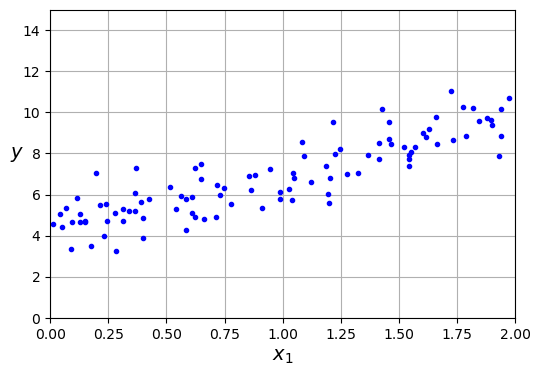

In [131]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [132]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
beta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [133]:
beta_best

array([[4.21509616],
       [2.77011339]])

Observe que la linea de regresión ajustadas tiene intercepto igual a 4.21 y una pendiente de 2.77.

Ahora usemos esa linea para la predicción para dos valores diferentes de X. Por ejemplo, si $X=0$, entonces $Y=4.21$. Si $X=2$, entonces $Y=9.75$.

In [134]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ beta_best
y_predict

array([[4.21509616],
       [9.75532293]])

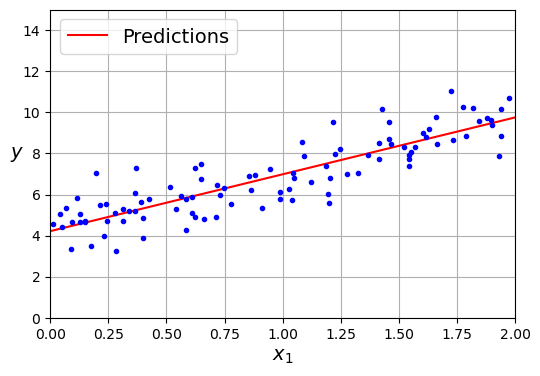

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")


plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

Hemos usado el paquete statmodels para realizar nuestras regresiones, sin embargo, me gustaría introducirles otros paquetes que serán de gran utilidad para el desarrollo de sus proyectos. El primero de ellos es el paquete scikit-learn, el cual es una librería de aprendizaje de máquina de código abierto para el lenguaje de programación Python. Incluye varios algoritmos de clasificación, regresión y otros. En este caso, usaremos el paquete para realizar una regresión lineal simple.

In [136]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

Entre los primeros comentarios que es importante mencionar son los siguientes:
- al igual que con el paquete statmodels, el paquete scikit-learn también requiere que la variable objetivo sea un vector de una dimensión.
- El metodo fit es comun para los dos para ajustar el modelo. 
- El metodo predict es comun para los dos para realizar predicciones.
- La libreria de ski-learn no incluye salidas tradicionales como las de statmodels, por eso hemos realizado primero el uso de statmodels.

In [137]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Como se mencionó previamente usar las ecuaciones normales tiene algunas desventajas por lo que existen otras formas de ajustar el modelo, aqui las discutiremos de forma breve, esto será de utilidad para el desarrollo de los métodos de regularización.

### Gradient Descent (descenso de gradiente)

* Método iterativo para encontrar el mínimo de una función diferenciable
* Más rápido para grandes y / o conjuntos de datos de alta dimensión
* Cuando $X^{T}X$ no puede calcularse o lleva demasiado tiempo ($p$ o $n$ es demasiado grande)

* **Se sobreajusta con mucha facilidad**.
    * Los coeficientes $w$ se hacen muy grandes (pendiente/declive pronunciado).
    * Un pequeño cambio en la entrada *x* resulta en una salida muy diferente *y 
    * No hay hiperparámetros que controlen la complejidad del modelo

#### Funcionamiento

* Empezar con un conjunto inicial aleatorio de pesos: $\mathbf{w}^0$.

* Dada una función de pérdida diferenciable $\mathcal{L}$ (por ejemplo $\mathcal{L}_{SSE}$), calcular $\nabla \mathcal{L}$.

* Para mínimos cuadrados: $\frac{\partial \mathcal{L}_{SSE}}{\partial w_i}(\mathbf{w}) = -2 \sum_{n=1}^{N} (y_n-\hat{y}_n) x_{n,i}$

 * Si la característica $X_{:,i}$ se asocia con grandes errores, el gradiente wrt $w_i$ será grande
* Actualizar _todos_ los pesos ligeramente (por _tamaño de paso_ o _velocidad de aprendizaje_ $\eta$) en dirección 'descendente'.
* Regla básica de actualización (paso s): 
 $$\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L}(\mathbf{w}^s)$$

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_gradient_descent.jpg" alt="ml" style="width: 500px;"/>

* Hiperparámetros importantes
    * Tasa de aprendizaje
        * Demasiado pequeño: convergencia lenta Demasiado grande: posible divergencia
    * Número máximo de iteraciones
        * Demasiado pequeño: no hay convergencia. Demasiado grande: desperdicia recursos
    * Decaimiento de la tasa de aprendizaje con tasa de decaimiento $k$
        * Por ejemplo, exponencial ($\eta^{s+1} = \eta^{0} e^{-ks}$), tiempo inverso ($\eta^{s+1} = \frac{\eta^{s}}{1+ks}$),...
    * Muchas formas más avanzadas de controlar el ritmo de aprendizaje (ver más adelante)
        * Técnicas adaptativas: dependen de cuánto mejoró la pérdida en el paso anterior

In [138]:
 pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [139]:
import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact

# Some convex function to represent the loss
def l_fx(x): 
    return (x * 4)**2 

# Derivative to compute the gradient
def l_dfx0(x0):
    return 8 * x0

@interact
def plot_learning_rate(learn_rate=(0.01,0.4,0.01), exp_decay=False):
    fig_scale = 1  # added this line for figure scaling
    w = np.linspace(-1,1,101)
    f = [l_fx(i) for i in w]
    w_current = -0.75
    learn_rate_current = learn_rate
    fw = [] # weight values
    fl = [] # loss values
    for i in range(10):
        fw.append(w_current)
        fl.append(l_fx(w_current))
        # Decay
        if exp_decay:
            learn_rate_current = learn_rate * math.exp(-0.3*i)
        # Update rule
        w_current = w_current - learn_rate_current * l_dfx0(w_current)
    fig, ax = plt.subplots(figsize=(5*fig_scale,3*fig_scale))
    ax.set_xlabel('w')
    ax.set_xticks([])
    ax.set_ylabel('loss')
    ax.plot(w, f, lw=2*fig_scale, ls='-', c='k', label='Loss')
    ax.plot(fw, fl, '--bo', lw=2*fig_scale, markersize=3)
    plt.ylim(-1,16)
    plt.xlim(-1,1)
    plt.show()  # to ensure the plot displays


interactive(children=(FloatSlider(value=0.2, description='learn_rate', max=0.4, min=0.01, step=0.01), Checkbox…

En dos dimensiones:

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_gradient_descent_2D.png" alt="ml" style="width: 700px;"/>

* Puede quedarse atascado en mínimos locales (si la pérdida no es totalmente convexa).
    * Si usted tiene muchos parámetros del modelo, esto es menos probable
    * Siempre se encuentra un camino hacia abajo en alguna dirección.
    * Los modelos con muchos parámetros suelen encontrar buenos mínimos locales.

In [140]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
beta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ beta - y)
    beta = beta - eta * gradients

Los parámetros del modelo entrenado

In [141]:
beta

array([[4.21509616],
       [2.77011339]])

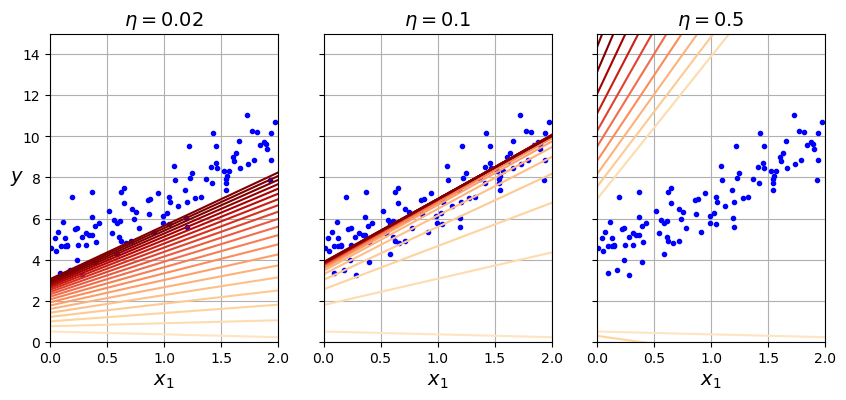

In [142]:


import matplotlib as mpl

def plot_gradient_descent(beta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    beta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ beta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ beta - y)
        beta = beta - eta * gradients
        beta_path.append(beta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return beta_path

np.random.seed(42)
beta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(beta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
beta_path_bgd = plot_gradient_descent(beta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(beta, eta=0.5)
plt.show()

### Stochastic Gradient Descent

* Calcular los gradientes no en todo el conjunto de datos, sino en un único punto de datos $i$ cada vez.
    * Gradient descent: $\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L}(\mathbf{w}^s) = \mathbf{w}^s-\frac{\eta}{n} \sum_{i=1}^{n} \nabla \mathcal{L_i}(\mathbf{w}^s)$
    * Stochastic Gradient Descent: $\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L_i}(\mathbf{w}^s)$
* Muchas variantes más suaves, por ejemplo
    * Minibatch SGD: calcula el gradiente en lotes de datos: $\mathbf{w}^{s+1} = \mathbf{w}^s-\frac{\eta}{B} \sum_{i=1}^{B} \nabla \mathcal{L_i}(\mathbf{w}^s)$
    * Stochastic Average Gradient Descent ([SAG](https://link.springer.com/content/pdf/10.1007/s10107-016-1030-6.pdf), [SAGA](https://proceedings.neurips.cc/paper/2014/file/ede7e2b6d13a41ddf9f4bdef84fdc737-Paper.pdf)). Con $i_s \in [1,n]$ elegido de forma aleatoria por iteración:
   * Incremental gradient:
      $\mathbf{w}^{s+1} = \mathbf{w}^s-\frac{\eta}{n} \sum_{i=1}^{n} v_i^s$ 
      
      con 

$$v_i^s = \begin{cases}\nabla \mathcal{L_i}(\mathbf{w}^s) & i = i_s \\ v_i^{s-1} & \text{otherwise} \end{cases}$$
        
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/08_SGD.png" alt="ml" style="float: left; width: 400px;"/>


In [143]:
beta_path_sgd = []  # extra code – we need to store the path of beta in the
                    #              parameter space to plot the next figure

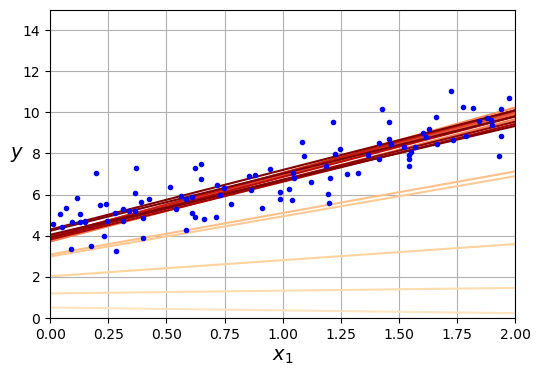

In [144]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
beta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ beta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ beta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        beta = beta - eta * gradients
        beta_path_sgd.append(beta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [145]:
beta

array([[4.21076011],
       [2.74856079]])

In [146]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [147]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### Mini-batch gradient descent




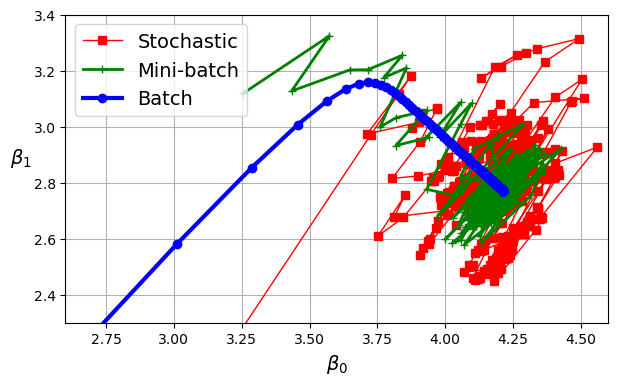

In [148]:

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
beta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

beta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ beta - yi)
        eta = learning_schedule(iteration)
        beta = beta - eta * gradients
        beta_path_mgd.append(beta)

beta_path_bgd = np.array(beta_path_bgd)
beta_path_sgd = np.array(beta_path_sgd)
beta_path_mgd = np.array(beta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(beta_path_sgd[:, 0], beta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(beta_path_mgd[:, 0], beta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(beta_path_bgd[:, 0], beta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\beta_0$")
plt.ylabel(r"$\beta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

### Regresión polinómica

En lecturas pasadas hemos revisado la transformación de variables que nos permiten realizar  usando a nuestras variables de entrada con diferentes grados. Hemos visto que para algunos problemas, la transformación de las variables de entrada puede ser de gran utilidad para mejorar el rendimiento de nuestros modelos, especificamente cuando vemos indicios de violación de la linealidad.

En este caso, usaremos la función PolynomialFeatures de scikit-learn para realizar la transformación de las variables de entrada. Para ello vamos a generar un conjunto de datos sintéticos que nos permitan ver el efecto de la transformación de las variables de entrada.

In [149]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

A continuación realizamos un plot simple de estos daatos, claramente vemos una relación no lineal entre las variables de entrada y la variable objetivo; podríamos sugerir una relación cuadrática entre las variables de entrada y la variable objetivo.   

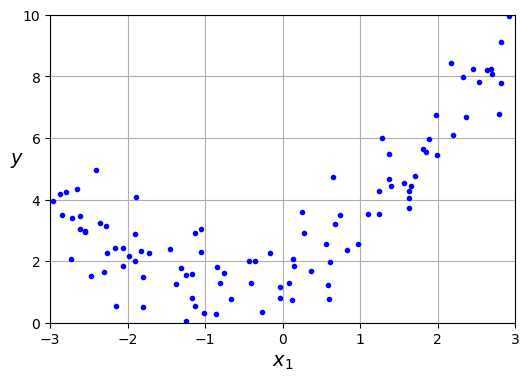

In [150]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Para realizar una regresión polinomica en ski-learn, primero debemos realizar la transformación de las variables de entrada usando la función PolynomialFeatures. Esta función nos permite realizar la transformación de las variables de entrada a un grado especifico. En este caso, usaremos un grado de 2, es decir, realizaremos la transformación de las variables de entrada a un grado cuadrático.

In [151]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [152]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [153]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

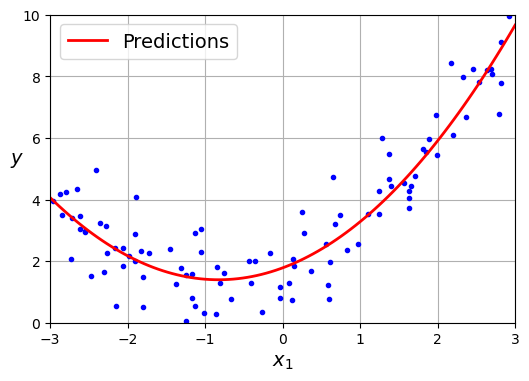

In [154]:

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Ahora vamos a graficar  tres modelos diferentes con el animo de recordar como lucen los resultados de una regresión lineal, una regresión polinomica de grado 2 y una regresión polinomica de grado 30.



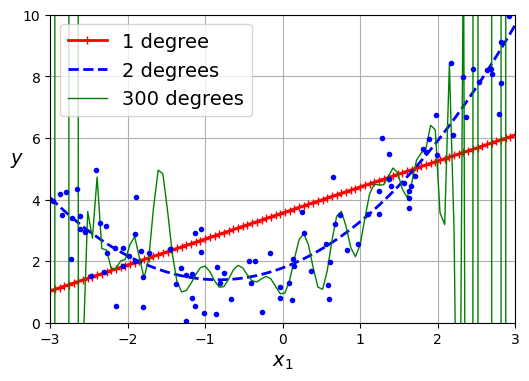

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    #polynomial_regression = make_pipeline(polybig_features, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

En lecturas pasadas vimos como los coeficientes de regresiones polinomicas con muchos grados pierden sentido. Vimos como era imposible calcular los errores estándar de dichos coeficientes lo cual impedia hacer inferencias del modelo. Este hecho nos ayudó a entender la importancia de la selección de variables, sin embargo ahora debemos aprender un método que nos permita observar los problemas de sobreajuste y subajuste de forma más clara. Adicionalmente, veremos una forma mas generica de regularizar nuestros modelos.

##  Diagnóstico de Problemas de Sesgo y Varianza

### Curvas de aprendizaje

Si realiza una regresión polinómica de alto grado, probablemente ajustará los datos de entrenamiento mucho mejor que con una regresión lineal pura. Por ejemplo, la Figura anterior muestra la aplicación de un modelo polinómico de 300 grados a los datos de entrenamiento anteriores y compara el resultado con un modelo lineal puro y un modelo cuadrático (polinómico de segundo grado). Observe cómo el modelo polinómico de 300 grados se contonea para acercarse lo más posible a las instancias de entrenamiento.

Este modelo de regresión polinómica de alto grado se ajusta en exceso a los datos de entrenamiento, mientras que el modelo lineal se ajusta por debajo. El modelo que mejor generalizará en este caso es el modelo cuadrático, lo que tiene sentido porque los datos se generaron utilizando un modelo cuadrático. Pero en general no sabrás qué función generó los datos, así que ¿cómo puedes decidir lo complejo que debe ser tu modelo? ¿Cómo puedes saber si tu modelo se ajusta demasiado o demasiado poco a los datos?

Una  otra forma de saberlo es observar las curvas de aprendizaje, que son gráficas del error de entrenamiento y del error de validación del modelo en función de la iteración de entrenamiento: basta con evaluar el modelo a intervalos regulares durante el entrenamiento, tanto en el conjunto de entrenamiento como en el conjunto de validación, y representar gráficamente los resultados.

Scikit-Learn tiene una útil función `learning_curve()` para ayudar con esto: entrena y evalúa el modelo usando validación cruzada. Por defecto, vuelve a entrenar el modelo en subconjuntos crecientes del conjunto de entrenamiento, pero si el modelo admite el aprendizaje incremental, puede establecer `exploit_incremental_learning=True` al llamar a `learning_curve()` y, en su lugar, entrenará el modelo de forma incremental. La función devuelve los tamaños de los conjuntos de entrenamiento con los que evaluó el modelo, y las puntuaciones de entrenamiento y validación que midió para cada tamaño y para cada pliegue de validación cruzada. Utilicemos esta función para ver las curvas de aprendizaje del modelo de regresión lineal simple :

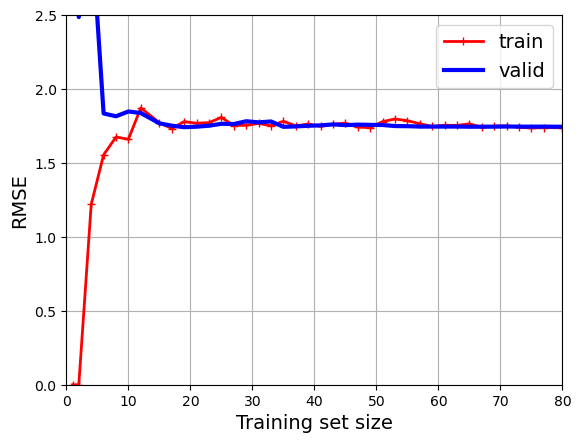

In [156]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)


plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

**Este modelo está subajustado**. Para ver por qué, veamos primero el error de entrenamiento. Cuando sólo hay una o dos instancias en el conjunto de entrenamiento, el modelo puede ajustarse perfectamente a ellas, razón por la cual la curva empieza en cero. Pero a medida que se añaden nuevos casos al conjunto de entrenamiento, resulta imposible que el modelo se ajuste perfectamente a los datos de entrenamiento, tanto porque los datos tienen ruido como porque no son lineales en absoluto. Por lo tanto, el error en los datos de entrenamiento aumenta hasta que alcanza una meseta, momento en el que la adición de nuevas instancias al conjunto de entrenamiento no mejora ni empeora mucho el error medio. 

Veamos ahora el error de validación: Cuando el modelo se entrena con muy pocas instancias de entrenamiento es incapaz de generalizar adecuadamente, por lo que el error de validación es inicialmente bastante grande. Luego, a medida que el modelo recibe más ejemplos de entrenamiento, aprende y, por tanto, el error de validación disminuye lentamente. Sin embargo, una vez más, una línea recta no puede modelizar bien los datos, por lo que el error acaba en una meseta, muy cerca de la otra curva.

**Estas curvas de aprendizaje son típicas de un modelo que no se ajusta bien. Ambas curvas han alcanzado una meseta; están cerca y son bastante altas.**

Veamos ahora las curvas de aprendizaje de un modelo polinómico de 10º grado sobre los mismos datos de entrenamiento:


In [157]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

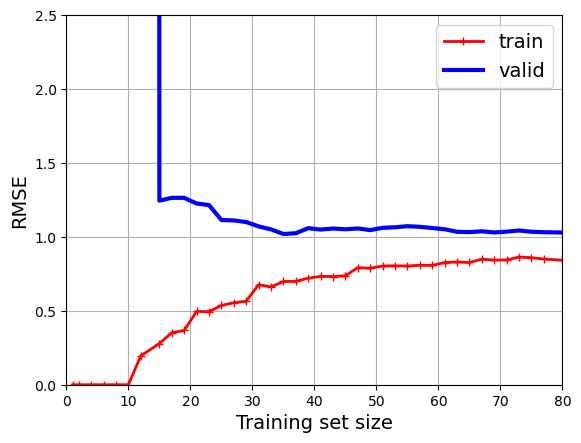

In [158]:

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

Estas curvas de aprendizaje se parecen un poco a las anteriores, pero hay dos diferencias muy importantes:

- El error en los datos de entrenamiento es mucho menor que antes.

- Hay un hueco entre las curvas. Esto significa que el modelo funciona mucho mejor con los datos de entrenamiento que con los datos de validación, lo que caracteriza a un modelo sobreajustado. Sin embargo, si utilizara un conjunto de entrenamiento mucho mayor, las dos curvas seguirían acercándose.

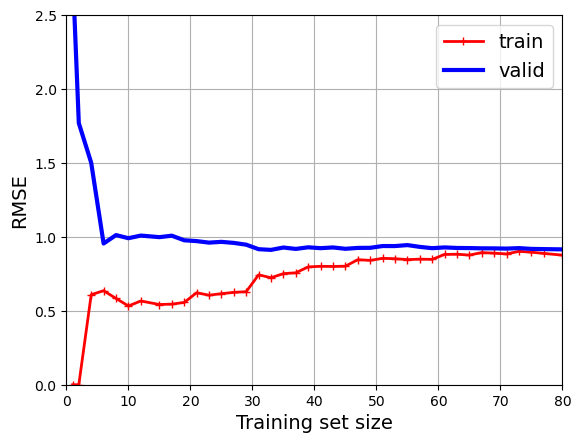

In [159]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")


train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

Una curva de aprendizaje "buena" que refleje un modelo bien ajustado, que no sufre ni de sobreajuste (overfitting) ni de subajuste (underfitting), mostraría las siguientes características:

1. **Desempeño en entrenamiento y validación**: Ambos deberían mejorar con la cantidad de datos o a lo largo de las épocas de entrenamiento, y eventualmente converger a un punto donde la mejora sea mínima o nula.

2. **Convergencia**: La brecha entre el desempeño del entrenamiento y el de validación debe ser relativamente pequeña. Si el modelo tiene un buen ajuste, debería generalizar bien, lo que significa que el rendimiento en los datos de entrenamiento debería ser similar al rendimiento en los datos de validación.

3. **Estabilidad**: Una vez que la convergencia es alcanzada, las métricas de desempeño deberían permanecer estables y no mostrar fluctuaciones significativas con más datos de entrenamiento o más iteraciones.


Visualmente, si graficáramos la exactitud (accuracy) o el error (como el error cuadrático medio) contra la cantidad de datos de entrenamiento o el número de épocas, esperaríamos ver algo similar a lo siguiente:

- La línea de entrenamiento comienza con un error alto (o baja precisión) y disminuye rápidamente.
- La línea de validación comienza con un error alto (o baja precisión) pero disminuye y se acerca a la línea de entrenamiento.
- Eventualmente, las líneas de entrenamiento y validación convergen y se estabilizan a una distancia razonablemente cercana una de la otra.



### Curvas de validación

Las curvas de validación son gráficos que representan el rendimiento de un modelo en los conjuntos de entrenamiento y validación en función de diferentes valores de un hiperparámetro específico. Estas curvas ayudan a identificar la configuración óptima del hiperparámetro y a diagnosticar problemas de sobreajuste o subajuste.


<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/03_Bias-Variance-Tradeoff.png" alt="ml" style="width: 40%"/>

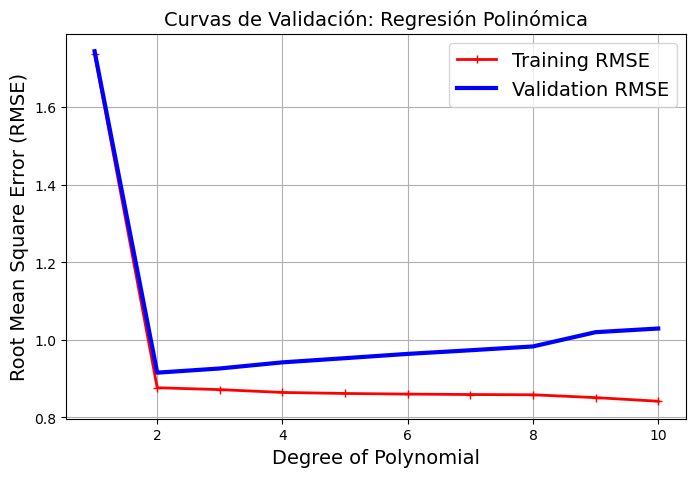

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

# Crear un rango de valores para el grado del polinomio
degree_range = np.arange(1, 11)

# Inicializar listas para almacenar los resultados de los errores de entrenamiento y validación
train_rmse = []
valid_rmse = []

# Calcular el error de entrenamiento y validación para cada grado del polinomio
for degree in degree_range:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(poly_features, std_scaler, lin_reg)
    
    train_scores, valid_scores = validation_curve(
        polynomial_regression, X, y,
        param_name="polynomialfeatures__degree",
        param_range=[degree],  # Se proporciona un rango de un solo valor para satisfacer la API
        cv=5, scoring="neg_mean_squared_error"
    )
    
    train_rmse.append(np.sqrt(-train_scores).mean())
    valid_rmse.append(np.sqrt(-valid_scores).mean())

# Graficar las curvas de validación
plt.figure(figsize=(8, 5))
plt.plot(degree_range, train_rmse, "r-+", linewidth=2, label="Training RMSE")
plt.plot(degree_range, valid_rmse, "b-", linewidth=3, label="Validation RMSE")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Root Mean Square Error (RMSE)")
plt.title("Curvas de Validación: Regresión Polinómica")
plt.legend()
plt.grid(True)
plt.show()




#### Interpretación de las Curvas de Validación

- **Curva Plana y Error Alto:** Si la curva de validación es relativamente plana y el error es alto, esto sugiere que el modelo tiene un alto sesgo, independientemente del valor del hiperparámetro. En este caso, cambiar el hiperparámetro no tendrá mucho efecto y podríamos necesitar un modelo más complejo o añadir más características.

- **Gran Brecha entre Entrenamiento y Validación:** Si la curva de entrenamiento tiene un rendimiento mucho mejor que la curva de validación, esto sugiere alta varianza y posiblemente sobreajuste. Un modelo más simple o más datos podrían ser necesarios para cerrar la brecha.

- **Punto de Equilibrio:** El objetivo es encontrar el punto en el que las curvas de entrenamiento y validación se encuentren lo más cercano posible, mientras mantienen un error bajo. Este es el punto de equilibrio entre sesgo y varianza.


####  Buenas Prácticas en el Uso de Curvas de Validación

- **Rango Adecuado del Hiperparámetro:** Asegúrese de explorar un rango adecuado y suficientemente gran del hiperparámetro para entender completamente su impacto en el modelo.

- **Usar Validación Cruzada:** Para obtener una evaluación más robusta, utilice validación cruzada al calcular el rendimiento del modelo para diferentes valores del hiperparámetro.

- **Visualización Clara:** Asegúrese de que sus gráficos sean claros y fáciles de interpretar, etiquetando los ejes y proporcionando una leyenda cuando sea necesario.



Diagrama de flujo resumido (por Andrew Ng)

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/03_Bias-Variance-Flowchart.png" alt="ml" style="width: 50%"/>

# Modelos lineales regularizados

Regularizar un modelo significa restringirlo para que sea más simple, reduciendo así el riesgo de sobreajuste: cuantos menos grados de libertad tenga, más difícil será que sobreajuste los datos. Una forma sencilla de regularizar un modelo polinómico es reducir el número de grados polinómicos.

Para un modelo lineal, la regularización se consigue normalmente restringiendo los betas del modelo. Ahora veremos la regresión de cresta (ridge), la regresión de lazo y la regresión de red elástica, que implementan tres formas diferentes de restringir los pesos.

## Regresión Ridge

* Añade un término de penalización a la función de pérdida de mínimos cuadrados:


$$\mathcal{L}_{Ridge} = \sum_{n=1}^{N} (y_n-(\mathbf{\beta}\mathbf{x_n} + \beta_0))^2 + \alpha \sum_{i=1}^{p} \beta_i^2$$ 


* El modelo se penaliza si utiliza coeficientes grandes ($w$).

    * Cada característica debe tener el menor efecto posible sobre el resultado. 

    * No queremos penalizar $\beta_0$, así que lo dejamos fuera.


* Regularización: restringir explícitamente un modelo para evitar el sobreajuste. 

    * Se llama regularización L2 porque usa la norma $L2$: $\sum \beta_i^2$.

* La fuerza de la regularización se puede controlar con el hiperparámetro $\alpha$.

    * Aumentar $\alpha$ causa más regularización (o encogimiento). Por defecto es 1.0.

* Sigue siendo convexo. Se puede optimizar de diferentes maneras:

    * Solución de forma cerrada (a.k.a. Cholesky): $\beta^{*} = (X^{T}X + \alpha I)^{-1} X^T Y$

    * Gradiente descendente y variantes, p. ej. Gradiente medio estocástico (SAG,SAGA)

        * Gradiente conjugado (CG): cada nuevo gradiente está influido por los anteriores.
        
    * Uso de Cholesky para conjuntos de datos pequeños, descenso de gradiente para conjuntos más grandes.
   

Generemos un conjunto de datos lineales muy pequeño y ruidoso:

In [161]:
# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

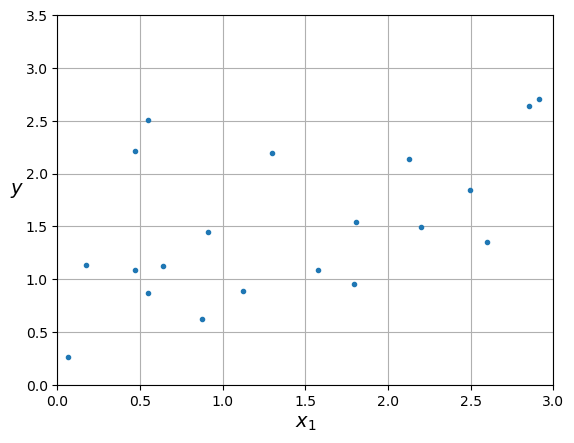

In [162]:

plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

La Figura siguiente muestra varios modelos Ridge que fueron entrenados en algunos datos lineales muy ruidosos utilizando diferentes valores $\alpha$ .

- A la izquierda, se utilizan modelos de ridge simples, que conducen a predicciones lineales.

- A la derecha, los datos se expanden primero usando `PolynomialFeatures(degree=10)`, luego se escalan usando `StandardScaler`, y finalmente los modelos ridge se aplican a las características resultantes: esto es regresión polinomial con regularización ridge. Observe cómo el aumento de $\alpha$ conduce a predicciones más planas (es decir, menos extremas, más razonables), reduciendo así la varianza del modelo pero aumentando su sesgo.



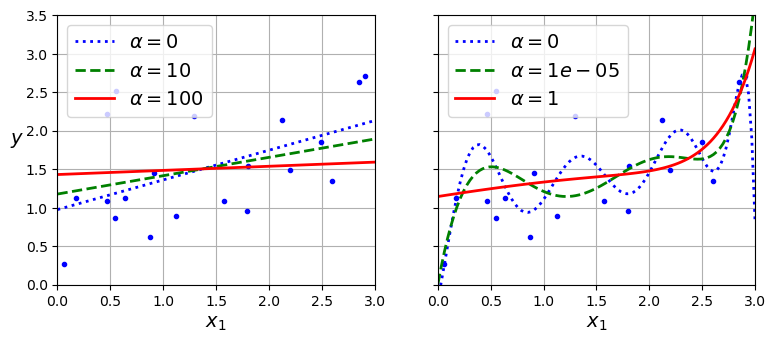

In [163]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [164]:

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [165]:

ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55321535]])

Si obtenemos los valores de los beta usando la forma cerrada y la encontramos usando el descenso de gradiente, veremos que los valores son muy similares.

In [166]:

alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [167]:
ridge_reg.intercept_, ridge_reg.coef_  

(array([0.97944909]), array([[0.38251084]]))

In [168]:
# pip install mglearn


Veamos cual es el efecto que hace la regularización rigde en el modelo de regresión:

* Primero vamos a usar el conjunto de datos de bostón para realizar una regresión lineal simple.

* Vamos a imprimir el valor de los coeficientes del modelo.

In [169]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_B, y_B = mglearn.datasets.load_extended_boston()
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, y_B, random_state=0)

lr = LinearRegression().fit(X_B_train, y_B_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [170]:
print("Weights (coefficients): {}".format(lr.coef_[0:40]))
print("Bias (intercept): {}".format(lr.intercept_))

Weights (coefficients): [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00]
Bias (intercept): 30.934563673640035


Tambien sustraemos el $R^2$ del modelo de regresión lineal simple para el conjunto de entrenamiento y el conjunto de prueba. Aquí podemos ver como difieren los resultados entre ambos conjuntos de datos, lo cual es un indicio de sobreajuste.

In [171]:
print("Training set score (R^2): {:.2f}".format(lr.score(X_B_train, y_B_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_B_test, y_B_test)))

Training set score (R^2): 0.95
Test set score (R^2): 0.61


Ahora vamos a entrenar el mismo conjunto de datos usando el modelo de regresión ridge con parámetros por defecto. Vamos a visualizar los coeficientes del modelo y el $R^2$ para el conjunto de entrenamiento y el conjunto de prueba.

In [172]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_B_train, y_B_train)
print("Weights (coefficients): {}".format(ridge.coef_[0:40]))
print("Bias (intercept): {}".format(ridge.intercept_))


Weights (coefficients): [-1.41368408e+00 -1.55661895e+00 -1.46543409e+00 -1.26616071e-01
 -7.91193605e-02  8.33161023e+00  2.54975060e-01 -4.94145701e+00
  3.89862268e+00 -1.05866058e+00 -1.58433734e+00  1.05103856e+00
 -4.01220799e+00  3.33720475e-01  3.64725471e-03 -8.49295793e-01
  7.44989267e-01 -1.43106836e+00 -1.62981017e+00 -1.40486294e+00
 -4.47314366e-02 -1.74619880e+00 -1.46715888e+00 -1.33237111e+00
 -1.69154625e+00 -5.06179637e-01  2.62197591e+00 -2.09210002e+00
  1.95074661e-01 -2.75469422e-01  5.11308202e+00 -1.67083739e+00
 -9.81863179e-02  6.34477127e-01 -6.10008281e-01  4.01805897e-02
 -1.27661999e+00 -2.91349679e+00  3.39544035e+00  7.91904036e-01]
Bias (intercept): 21.390525958610056


In [173]:
print("Training set score: {:.2f}".format(ridge.score(X_B_train, y_B_train)))
print("Test set score: {:.2f}".format(ridge.score(X_B_test, y_B_test)))

Training set score: 0.89
Test set score: 0.75


La puntuación del conjunto de pruebas es más alta y la del conjunto de entrenamiento más baja: ¡menos sobreajuste!

* Podemos trazar los valores de peso para diferentes niveles de regularización para  explorar el efecto de $\alpha$.



In [174]:
from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.linear_model import Ridge

@interact
def plot_ridge(alpha=(0,10.0,0.05)):
    r = Ridge(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(r.coef_, 'o', markersize=3)
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25)
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, step=0.05), Output()), _dom_classe…

* Aumentar la regularización disminuye los valores de los coeficientes, pero nunca a 0.

Ahora observemos como usar las curvas de validación para encontrar el valor óptimo de $\alpha$. Adicionalmente observar el efecto de la estandarización de las variables de entrada.

Valor óptimo de alpha: 17.886495290574352


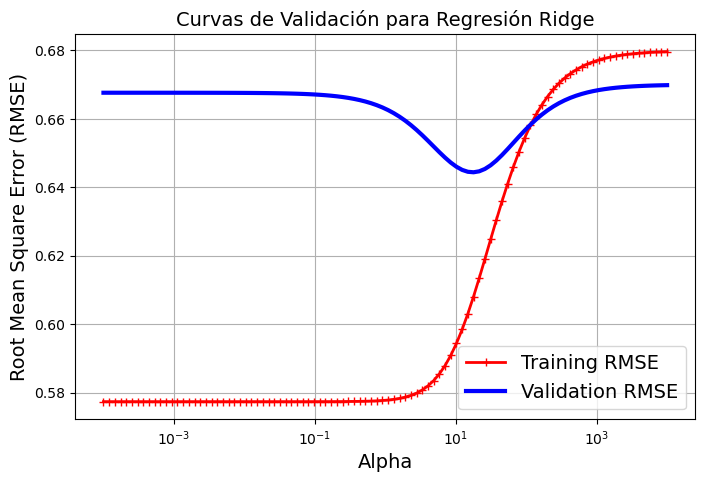

In [175]:
from sklearn.pipeline import Pipeline

# Definir el modelo de regresión Ridge con un pipeline que incluye la estandarización de los datos
# model = Pipeline([
#    ("scaler", StandardScaler()),
#    ("ridge_reg", Ridge())
#])

model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge_reg", Ridge())
])

# Definir un rango de valores para el parámetro alpha más refinado y centrado
alpha_range = np.logspace(-4, 4, 100)

# Calcular las curvas de validación
train_scores, valid_scores = validation_curve(
    model, X, y, param_name="ridge_reg__alpha", param_range=alpha_range, 
    cv=5, scoring="neg_mean_squared_error")

# Calcular el error de entrenamiento y validación (RMSE)
train_rmse = np.sqrt(-train_scores).mean(axis=1)
valid_rmse = np.sqrt(-valid_scores).mean(axis=1)

# Buscar el índice del mínimo valor de RMSE de validación
optimal_alpha_index = np.argmin(valid_rmse)

# Extraer el valor óptimo de alpha
optimal_alpha = alpha_range[optimal_alpha_index]

# Imprimir el valor óptimo de alpha
print("Valor óptimo de alpha:", optimal_alpha)

# Graficar las curvas de validación
plt.figure(figsize=(8, 5))
plt.plot(alpha_range, train_rmse, "r-+", linewidth=2, label="Training RMSE")
plt.plot(alpha_range, valid_rmse, "b-", linewidth=3, label="Validation RMSE")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Root Mean Square Error (RMSE)")
plt.title("Curvas de Validación para Regresión Ridge")
plt.legend()
plt.grid(True)
plt.show()


In [176]:
# mostrar coeficientes para alpha óptimo
model_final_R = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge_reg", Ridge(alpha=optimal_alpha))
])

model_final_R.fit(X_B_train, y_B_train)
print("Weights (coefficients): {}".format(model_final_R.named_steps["ridge_reg"].coef_[0:40]))
print("Bias (intercept): {}".format(model_final_R.named_steps["ridge_reg"].intercept_))



Weights (coefficients): [-0.10501626 -0.22476702  0.23546786  0.28809698  0.08466547  1.83654927
  0.10309989 -0.95553074  0.75408609 -0.0377328  -0.00906469  0.09895924
 -0.31510606  0.68606979  0.22126502 -0.05131157  1.14640634 -0.59954729
 -0.29470485 -0.14814737  0.22505465 -0.23542681 -0.17528925 -0.20030704
 -0.18783716 -0.09574555  0.30085367 -0.36024477  0.06979977 -0.1591779
  0.7741319  -0.09167087 -0.1245441  -0.00654476  0.10748009  0.31295368
 -0.16736245 -0.7985789   0.5830023   0.20212767]
Bias (intercept): 22.608707124010547


In [177]:
print("Training set score: {:.2f}".format(model_final_R.score(X_B_train, y_B_train)))
print("Test set score: {:.2f}".format(model_final_R.score(X_B_test, y_B_test)))

Training set score: 0.91
Test set score: 0.78


## Lasso Regression

Añade un término de penalización diferente a la suma de mínimos cuadrados:

$$\mathcal{L}_{Lasso} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i=1}^{p} |w_i|$$

* Se llama regularización L1 porque usa la norma L1.

    * Causará que muchos pesos sean exactamente 0

* El mismo parámetro $\alpha$ para controlar la fuerza de la regularización. 

    * Tendrá de nuevo un "punto dulce" dependiendo de los datos.

* No hay solución de forma cerrada

* No estrictamente convexa, y no diferenciable.

    * Las ponderaciones pueden optimizarse mediante _descenso por coordenadas_.

Para nuestros primeros datos sinteticos de prueba, observe las diferencias entre la regresión de ridge y la regresión de lazo:

In [178]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

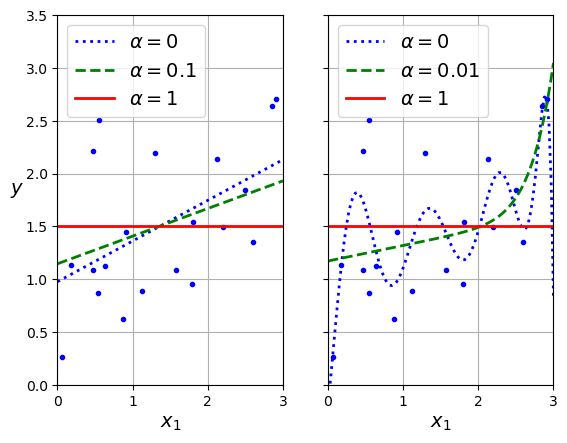

In [179]:

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Una característica importante de la regresión lazo es que tiende a eliminar los pesos de las características menos importantes (es decir, los pone a cero). Por ejemplo, la línea discontinua del gráfico de la derecha de la Figura anterior (con $\alpha$ = 0,01) parece aproximadamente cúbica: todos los pesos de las características polinómicas de alto grado son iguales a cero. 

En otras palabras, la regresión lazo realiza **automáticamente la selección de características** y produce un modelo disperso con pocas ponderaciones de características distintas de cero.

Continuando con el conjunto de datos de Boston, vamos a ajustar un modelo con regularización Lasso y veremos como se comporta.

In [180]:
from sklearn.linear_model import Lasso

@interact
def plot_lasso(alpha=(0,0.5,0.005)):
    r = Lasso(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(r.coef_, 'o', markersize=3)
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)), pad=0.5)
    ax.set_xlabel("Coefficient index", labelpad=0)
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25);
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, step=0.005), Output()), _dom_class…

Ahora usemos las curvas de validación para encontrar el valor óptimo de $\alpha$. Adicionalmente observar el efecto de la estandarización de las variables de entrada.

Valor óptimo de alpha: 0.02


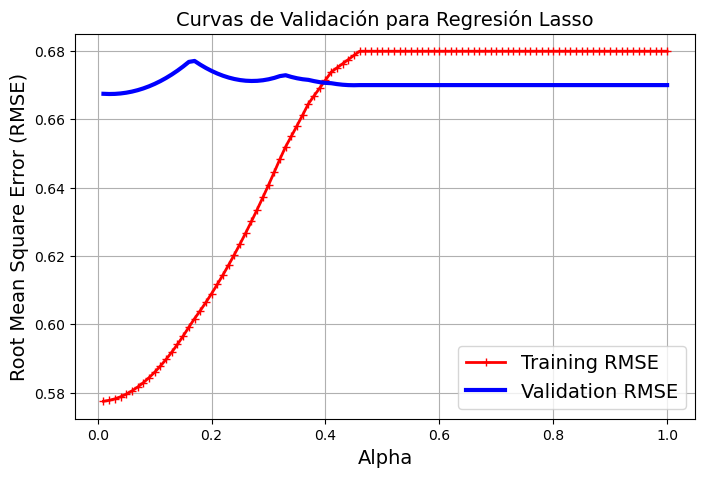

In [181]:

# Definir el modelo de regresión Lasso con un pipeline que incluye la estandarización de los datos
model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso_reg", Lasso(max_iter=10000))
])

# Definir un rango de valores para el parámetro alpha
alpha_range = np.linspace(0.01, 1, 100)  # Lasso requiere un valor alpha > 0

# Calcular las curvas de validación
train_scores, valid_scores = validation_curve(
    model, X, y, param_name="lasso_reg__alpha", param_range=alpha_range, 
    cv=5, scoring="neg_mean_squared_error")

# Calcular el error de entrenamiento y validación (RMSE)
train_rmse = np.sqrt(-train_scores).mean(axis=1)
valid_rmse = np.sqrt(-valid_scores).mean(axis=1)

# Buscar el índice del mínimo valor de RMSE de validación
optimal_alpha_index = np.argmin(valid_rmse)

# Extraer el valor óptimo de alpha
optimal_alpha = alpha_range[optimal_alpha_index]

# Imprimir el valor óptimo de alpha
print("Valor óptimo de alpha:", optimal_alpha)

# Graficar las curvas de validación
plt.figure(figsize=(8, 5))
plt.plot(alpha_range, train_rmse, "r-+", linewidth=2, label="Training RMSE")
plt.plot(alpha_range, valid_rmse, "b-", linewidth=3, label="Validation RMSE")
plt.xlabel("Alpha")
plt.ylabel("Root Mean Square Error (RMSE)")
plt.title("Curvas de Validación para Regresión Lasso")
plt.legend()
plt.grid(True)
plt.show()


In [182]:
# Mostra el modelo final de regresión Lasso

Final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso_reg", Lasso(alpha=optimal_alpha))
])
Final_model.fit(X, y)
Final_model.predict([[1.5]])



array([1.5507376])

In [183]:
# ver los coeficientes del modelo final
coef = Final_model.named_steps['lasso_reg'].coef_[0]
print(format(coef, '.10f'))

0.3265729380


## Elastic Net


* Añade regularización L1 y L2:

$$\mathcal{L}_{Elastic} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \rho \sum_{i=0}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=0}^{p} w_i^2$$ 

* $\rho$ es la relación L1
    * Con $\rho=1$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Lasso}$
    * Con $\rho=0$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Ridge}$
    * $0 < \rho < 1$ establece un compromiso entre L1 y L2.
* Permite el aprendizaje de modelos dispersos (como Lasso) manteniendo los beneficios de la regularización L2.
    * Por ejemplo, si 2 características están correlacionadas, Lasso probablemente elige una al azar, Elastic-Net mantiene ambas. 
* Las ponderaciones pueden optimizarse mediante descenso por coordenadas (similar a Lasso).

A continuaciòn vemos el efecto en la predicción y en los coeficientes que hace la regularización elastic net para el conjunto de datos sinteticos. 

In [184]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

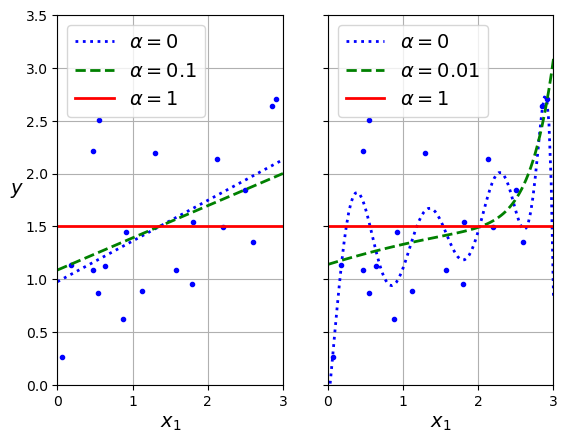

In [185]:

plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Ahora observemos el efecto de la regularización elastic net en el modelo de regresión de boston.

In [186]:
@interact
def plot_elasticnet(alpha=(0.01, 10.0, 0.05), l1_ratio=(0.0, 1.0, 0.05)):
    en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(en.coef_, 'o', markersize=3)
    ax.set_title("alpha {}, l1_ratio {}, score {:.2f} (training score {:.2f})"
                 .format(alpha, l1_ratio, en.score(X_B_test, y_B_test), en.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(en.coef_))
    ax.set_ylim(-25, 25)
    ax.set_xlim(0, 50)
    plt.show()

interactive(children=(FloatSlider(value=4.96, description='alpha', max=10.0, min=0.01, step=0.05), FloatSlider…

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# Definir el modelo de regresión Elastic Net con un pipeline que incluye la estandarización de los datos
model = Pipeline([
    ("scaler", StandardScaler()),
    ("elastic_net", ElasticNet(max_iter=100000, tol=0.001))
])

# Definir los rangos de valores para los parámetros alpha y l1_ratio
param_grid = {
    "elastic_net__alpha": np.linspace(0.01, 1, 10),
    "elastic_net__l1_ratio": np.linspace(0, 1, 10)
}

# Configurar y realizar la búsqueda en malla con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X, y)

# Obtener la mejor combinación de parámetros
best_parameters = grid_search.best_params_

# Imprimir la mejor combinación de alpha y l1_ratio
print("Mejores parámetros:")
print("Alpha:", best_parameters["elastic_net__alpha"])
print("l1_ratio:", best_parameters["elastic_net__l1_ratio"])


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.821e+00, tolerance: 7.333e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.553e+00, tolerance: 8.452e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

Mejores parámetros:
Alpha: 0.78
l1_ratio: 0.0


## Interpretación geométrica de las regularizaciones

A continuación usaremos un conjunto de datos sintéticos para ver la interpretación geométrica de las regularizaciones.





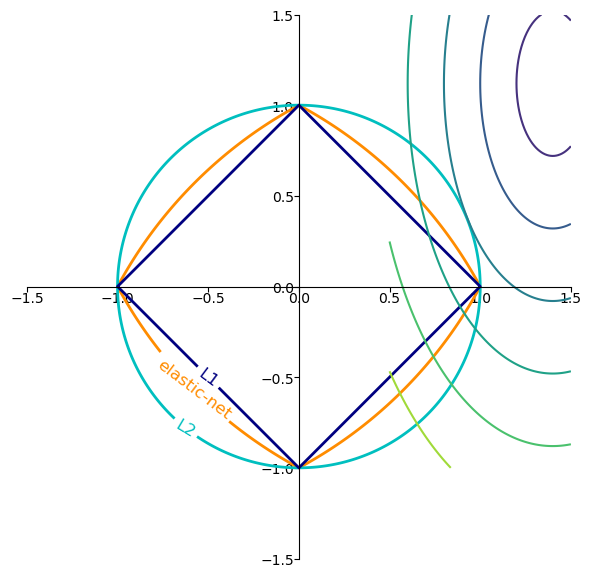

In [188]:
def plot_loss_interpretation():
    line = np.linspace(-1.5, 1.5, 1001)
    xx, yy = np.meshgrid(line, line)

    l2 = xx ** 2 + yy ** 2
    l1 = np.abs(xx) + np.abs(yy)
    rho = 0.7
    elastic_net = rho * l1 + (1 - rho) * l2

    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1], linewidths=2, colors="darkorange")
    l2_contour = plt.contour(xx, yy, l2, levels=[1], linewidths=2, colors="c")
    l1_contour = plt.contour(xx, yy, l1, levels=[1], linewidths=2, colors="navy")
    ax.set_aspect("equal")
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')

    plt.clabel(elastic_net_contour, inline=1, fontsize=12,
               fmt={1.0: 'elastic-net'}, manual=[(-0.6, -0.6)])
    plt.clabel(l2_contour, inline=1, fontsize=12,
               fmt={1.0: 'L2'}, manual=[(-0.5, -0.5)])
    plt.clabel(l1_contour, inline=1, fontsize=12,
               fmt={1.0: 'L1'}, manual=[(-0.5, -0.5)])

    x1 = np.linspace(0.5, 1.5, 100)
    x2 = np.linspace(-1.0, 1.5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = np.sqrt(np.square(X1/2-0.7) + np.square(X2/4-0.28))
    cp = plt.contour(X1, X2, Y)
    #plt.clabel(cp, inline=1, fontsize=10)
    ax.tick_params(axis='both', pad=0)

    plt.tight_layout()
    plt.show()
plot_loss_interpretation()


1. **Círculos (L2 - Ridge)**:
   - Representan la penalización L2. 
   - En la regresión Ridge, la magnitud de los coeficientes está penalizada, por lo que intenta mantener los coeficientes lo más pequeños posible. 
   - La solución óptima bajo esta penalización es donde las elipses concéntricas (que representan los niveles de coste) tocan por primera vez el círculo. 

2. **Rombos (L1 - Lasso)**:
   - Representan la penalización L1. 
   - En la regresión Lasso, la suma absoluta de los coeficientes está penalizada, lo que lleva a muchos coeficientes a ser exactamente cero.
   - La solución óptima bajo esta penalización es donde las elipses concéntricas tocan por primera vez el rombo. Nota cómo a menudo toca en los vértices, lo que lleva a coeficientes que son exactamente cero.

3. **Forma entre el círculo y el rombo (ElasticNet)**:
   - Representa la combinación de penalizaciones L1 y L2, como en la regresión ElasticNet.
   - Esta combinación trata de equilibrar las propiedades de Lasso y Ridge, resultando en una solución que puede tener algunas características con coeficientes exactamente cero, mientras que otras tienen coeficientes pequeños pero diferentes de cero.
   - La solución óptima es donde las elipses concéntricas tocan por primera vez esta forma.

4. **Elipses concéntricas**:
   - Representan los niveles de coste (o error) para diferentes conjuntos de coeficientes.
   - La solución óptima de cualquier método de regresión es el conjunto de coeficientes que minimiza este coste, sujeto a las restricciones impuestas por la penalización.

En resumen:
- La regresión Ridge (L2) tiende a producir coeficientes pequeños pero diferentes de cero.
- La regresión Lasso (L1) puede hacer que algunos coeficientes sean exactamente cero, actuando así como una especie de selección de características.
- ElasticNet combina estas dos propiedades, siendo útil cuando hay muchas características correlacionadas.

